In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

### Exercice 1
Let $X_1, X_2, \cdots, X_n$ be a sample from the Uniform distribution on $[0, \theta]$. Perform a Monte-Carlo simulation to investiage empirically the asymptotic distribution of $\hat{\alpha}_1=2 \bar{X}$ and $\hat{\alpha}_2=\max \left(X_1, \ldots, X_n\right)$ considered in class. Show with a qq-plot that
$$
\sqrt{n}\left(\hat{\alpha}_1-\theta\right) \xrightarrow{d} \mathcal{N}\left(0, \frac{\theta^2}{3}\right), \quad n\left(\theta-\hat{\alpha}_2\right) \xrightarrow{d} \operatorname{Exp}\left(\frac{1}{\theta}\right) .
$$

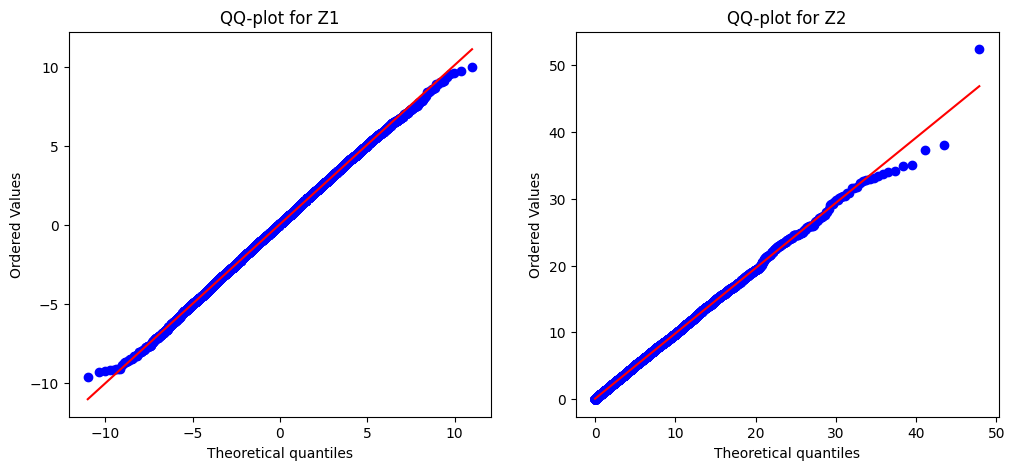

In [2]:
t = 5
n = 100
m = 10000

alpha_1, alpha_2 = [], []

X = np.random.uniform(0, t, size=(n, m))
alpha_1 = 2*np.mean(X, axis=0)
alpha_2 = np.max(X, axis=0)

Z1 = np.sqrt(n)*(alpha_1 - t)
Z2 = n*(t - alpha_2)

# QQ-plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
st.probplot(Z1, dist=st.norm(loc=0, scale=t/np.sqrt(3)), plot=ax[0])
ax[0].set_title("QQ-plot for Z1")
st.probplot(Z2, dist=st.expon(scale=t), plot=ax[1])
ax[1].set_title("QQ-plot for Z2")

plt.show()

In [3]:
print("Results for Z1:\n")
print("Expected mean: 0, Obtained mean:", round(np.mean(Z1), 2))
print("Expected variance:", round(t**2/3, 2), ", Obtained variance:", round(np.var(Z1), 2))
print("\nResults for Z2:\n")
print("Expected mean:", t, ", Obtained mean:", round(np.mean(Z2), 2))
print("Expected variance:", round(t**2, 2), ", Obtained variance:", round(np.var(Z2), 2))

Results for Z1:

Expected mean: 0, Obtained mean: 0.05
Expected variance: 8.33 , Obtained variance: 8.48

Results for Z2:

Expected mean: 5 , Obtained mean: 4.96
Expected variance: 25 , Obtained variance: 23.79


### Exercice 2
For a given vector of data $\mathbf{y}=\left(y_1, \ldots, y_n\right)$ and a given level $\alpha \in(0,1)$, program a function that performs the Student t-test to test

$$
H_0: \mu=0
$$

against

$$
\mu \neq 0
$$

where $\mu=\mathbb{E}(Y)$.
Empirically evaluate the power of the test as a function of $\mu$ for a given $n$. Then redo the experiment with a larger $n$.

Instead of simulating Gaussian observations, simulate data mean mean $\mu$ but with heavier tails, e.g., Student with 4 degrees of freedom. Yet employ the same Student t-test to test $H_0$. What happens to the power curve? Is the level of the test still the desired $\alpha$ ?

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/y9/m7n13js92650wfkhchpgd1r00000gn/T/ipykernel_73655/1531020205.py:2: SyntaxWarning: invalid escape sequence '\s'
  """


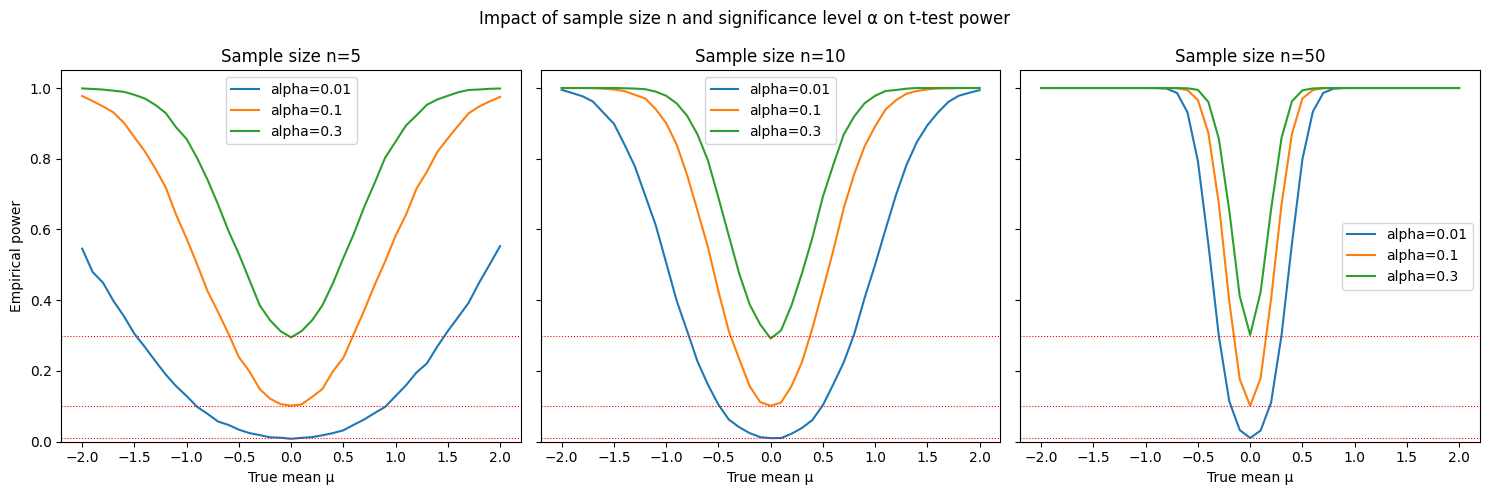

In [6]:
def t_test(y, alpha=0.05, axis=None):
    """
    Given a sample of data y, the test statistic is

    T = \frac{\bar{Y}}{S / \sqrt{n}},
    where
        •	\bar{Y} = \tfrac{1}{n}\sum y_i,
        •	S^2 = \tfrac{1}{n-1}\sum (y_i-\bar{Y})^2.

    Under H_0:\mu=0 and assuming Y_i \sim \mathcal{N}(0,\sigma^2), we have
    T \sim t_{n-1}.

    The two-sided test at level \alpha rejects if
    |T| > t_{n-1,\,1-\alpha/2}.

    Args:
        y (array-like): sample of data
        alpha (float): significance level
        axis (int, optional): axis along which to compute the test statistic. Defaults to None.

    Returns:
        bool: True if H_0 is rejected, False otherwise
    """
    n = len(y)
    ybar = np.mean(y, axis=axis)
    s = np.std(y, ddof=1, axis=axis)
    T = ybar / (s/np.sqrt(n))
    crit = st.t.ppf(1-alpha/2, df=n-1) # generates the 1-alpha/2 quantile of the t distribution with n-1 degrees of freedom
    return abs(T) > crit


def power_simulation(mu, sigma=1, n=50, alpha=0.05, m=10000):
    """
    Simulate the power of the t-test; that is the probability of rejecting the null hypothesis
    given that the null hypothesis is false.

    Args:
        mu (float): true mean under H_1
        sigma (float): standard deviation
        n (int): sample size
        alpha (float): significance level
        m (int): number of simulations

    Returns:
        float: estimated power of the test
    """
    rejections = 0
    y = np.random.normal(mu, sigma, size=(n, m))
    test_results = t_test(y, alpha=alpha, axis=0)
    rejections = np.sum(test_results)
    return rejections / m

mu_vals = np.linspace(-2, 2, 41)
n_list = [5, 10, 50]
alpha_list = [0.01, 0.1, 0.3]

# Plot: one subplot per n, curves for different alphas
fig, axes = plt.subplots(1, len(n_list), figsize=(15,5), sharey=True)

for i, n in enumerate(n_list):
    ax = axes[i]
    for alpha in alpha_list:
        powers = [power_simulation(mu, n=n, alpha=alpha) for mu in mu_vals]
        ax.plot(mu_vals, powers, label=f"alpha={alpha}")
        ax.axhline(alpha, color='red', linestyle=':', linewidth=0.8)
    ax.set_title(f"Sample size n={n}")
    ax.set_xlabel("True mean μ")
    ax.set_ylim(0, 1.05)
    if i == 0:
        ax.set_ylabel("Empirical power")
    ax.legend()

plt.suptitle("Impact of sample size n and significance level α on t-test power")
plt.tight_layout()
plt.show()

As expected, smaller $\alpha$ makes the test stricter and $n$ needs to be bigger in order to have a good test power. We also see that $\alpha$ does indeed matches the probability of rejecting $H_0$ even though it is true.

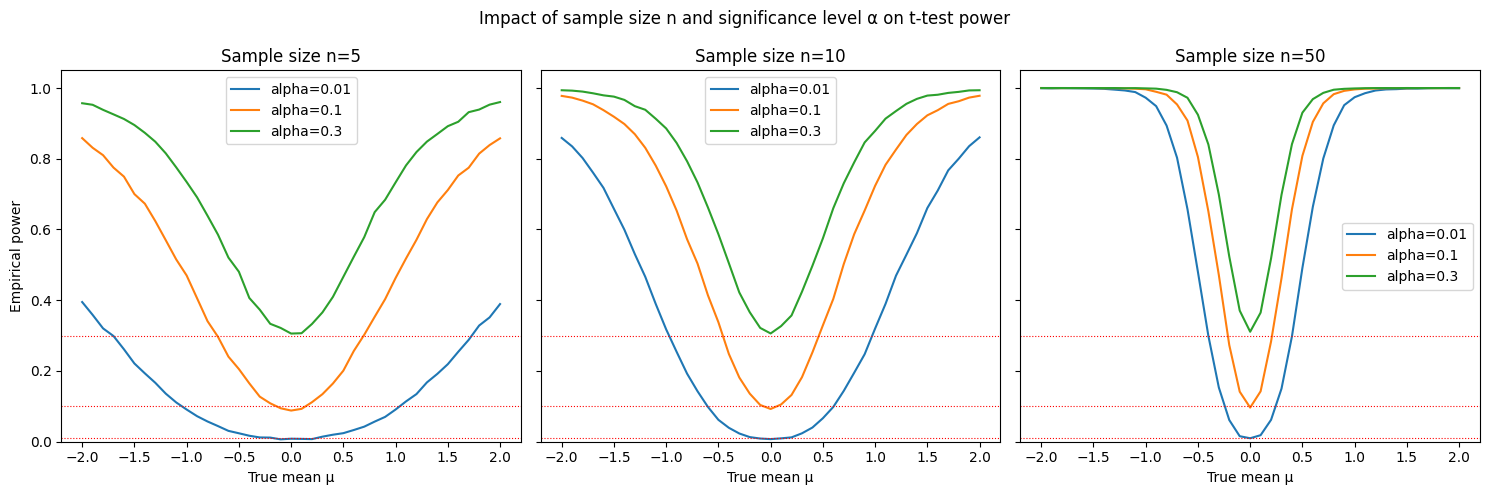

In [7]:
def power_simulation_stud(mu, n=50, alpha=0.05, m=10000):
    """
    Simulate the power of the t-test; that is the probability of rejecting the null hypothesis
    given that the null hypothesis is false.

    Args:
        mu (float): true mean under H_1
        sigma (float): standard deviation
        n (int): sample size
        alpha (float): significance level
        m (int): number of simulations

    Returns:
        float: estimated power of the test
    """
    rejections = 0
    y = mu + np.random.standard_t(df=4, size=(n, m))
    test_results = t_test(y, alpha=alpha, axis=0)
    rejections = np.sum(test_results)
    return rejections / m


mu_vals = np.linspace(-2, 2, 41)
n_list = [5, 10, 50]
alpha_list = [0.01, 0.1, 0.3]

# Plot: one subplot per n, curves for different alphas
fig, axes = plt.subplots(1, len(n_list), figsize=(15,5), sharey=True)

for i, n in enumerate(n_list):
    ax = axes[i]
    for alpha in alpha_list:
        powers = [power_simulation_stud(mu, n=n, alpha=alpha) for mu in mu_vals]
        ax.plot(mu_vals, powers, label=f"alpha={alpha}")
        ax.axhline(alpha, color='red', linestyle=':', linewidth=0.8)
    ax.set_title(f"Sample size n={n}")
    ax.set_xlabel("True mean μ")
    ax.set_ylim(0, 1.05)
    if i == 0:
        ax.set_ylabel("Empirical power")
    ax.legend()

plt.suptitle("Impact of sample size n and significance level α on t-test power")
plt.tight_layout()
plt.show()

The heavier tails generate flatter power curves

#### Analysis for alpha

In [9]:
n = 5
alpha_values = [0.01, 0.1, 0.3]
powers_at_0_gaussian = [power_simulation(mu=0, n=n, alpha=alpha, m=500_000) for alpha in alpha_values]
powers_at_0_student = [power_simulation_stud(mu=0, n=n, alpha=alpha, m=500_000) for alpha in alpha_values]
powers_at_0_gaussian, powers_at_0_student

([np.float64(0.010068), np.float64(0.099904), np.float64(0.301042)],
 [np.float64(0.007158), np.float64(0.087892), np.float64(0.30525)])